In [1]:
from PIL import Image

import imagehash
import tarfile
import io
import matplotlib.pyplot as plt

In [2]:
# Insert your own file path below
path = 'pref_000.tar.gz'
tf = tarfile.open(path)

img_names = tf.getnames()
num_files = len(img_names)

Wall time: 7.26 s


In [3]:
dist = 100
D = 12
total_close = 0
min_coords_list = []

img_p = []
for i in range(num_files):
    img = Image.open(io.BytesIO(tf.extractfile(tf.getmember(img_names[i])).read()))
    phash_val = imagehash.phash(img)
    img_p.append(phash_val)

Wall time: 35.9 s


Wall time: 4min 30s


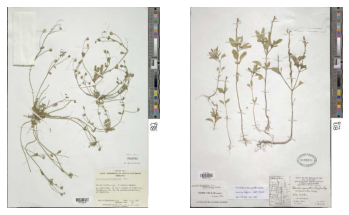

In [4]:
for image in range(num_files-1):
    for images in range(image+1, num_files)
        d = img_p[image]-img_p[images]
        if d <= dist:
            dist = d
            coord = (image, images, dist)
    if dist <= D:
        total_close += 1
        min_coords_list.append(coord)
        plt.clf()
        plt.subplot(121)
        plt.imshow(Image.open(io.BytesIO(tf.extractfile(tf.getmember(img_names[coord[0]])).read())))
        plt.axis('off')
        plt.subplot(122)
        plt.imshow(Image.open(io.BytesIO(tf.extractfile(tf.getmember(img_names[coord[1]])).read())))
        plt.axis('off')
        plt.savefig(f'Pair {coord[0]}-{coord[1]}.png')
    dist = 100